In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
df = pd.read_csv('world_population.csv')

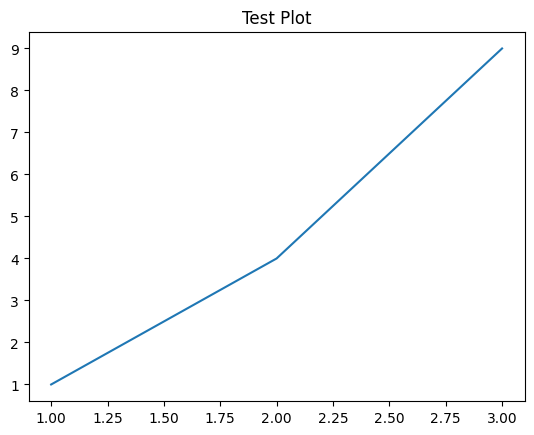

In [1]:

# Test plot
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('Test Plot')
plt.show()


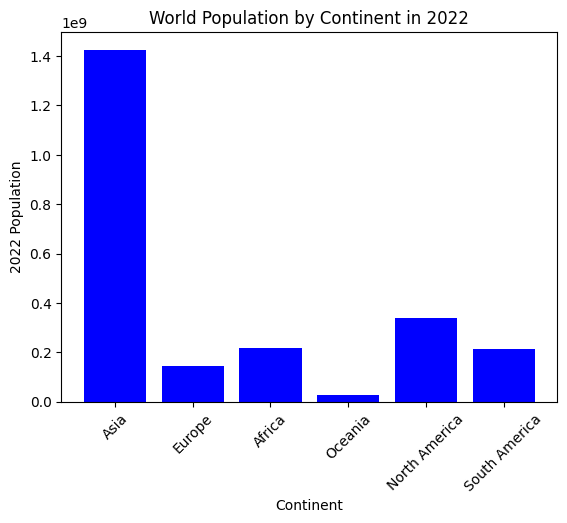

In [10]:
df = pd.read_csv('world_population.csv')

# Plot population by continent for 2022
plt.bar(df['Continent'], df['2022 Population'], color='b')
plt.title('World Population by Continent in 2022')
plt.xlabel('Continent')
plt.ylabel('2022 Population')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()



<Figure size 1400x800 with 0 Axes>

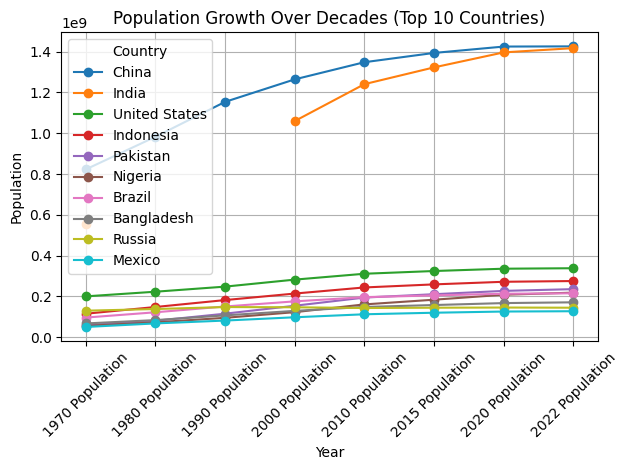

In [18]:
df = pd.read_csv('world_population.csv')

# Define the top 10 countries by population in 2022
top_countries = df.nlargest(10, '2022 Population')

# Define the columns that represent the years
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Plot the data
plt.figure(figsize=(14, 8))
top_countries.set_index('Country')[years].transpose().plot(marker='o', linestyle='-')
plt.title('Population Growth Over Decades (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)

# Optionally, set a logarithmic scale for the y-axis if the data spans multiple orders of magnitude
# plt.yscale('log')

plt.legend(title='Country')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

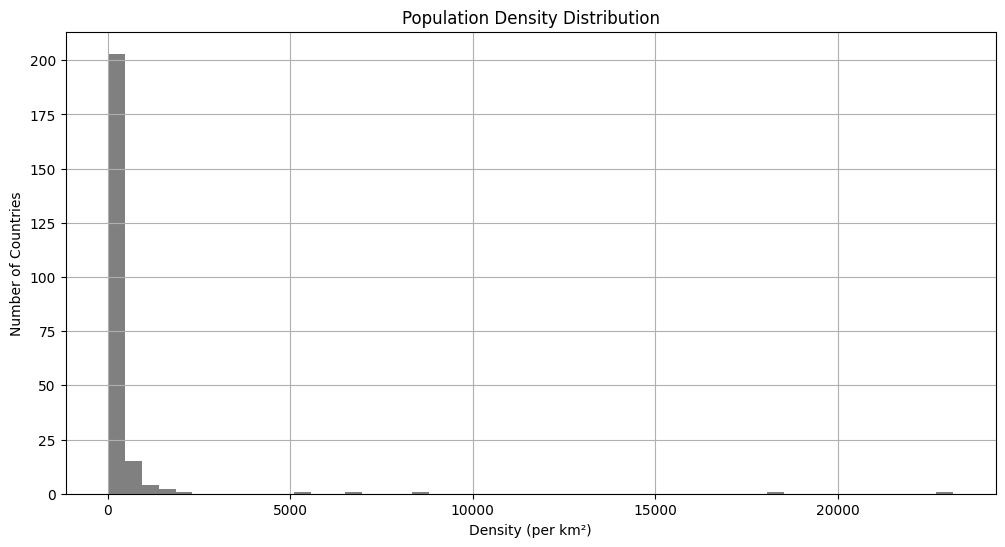

In [21]:
df = pd.read_csv('world_population.csv')

plt.figure(figsize=(12, 6))
df['Density (per km²)'].hist(bins=50, color='gray')
plt.title('Population Density Distribution')
plt.xlabel('Density (per km²)')
plt.ylabel('Number of Countries')
plt.show()

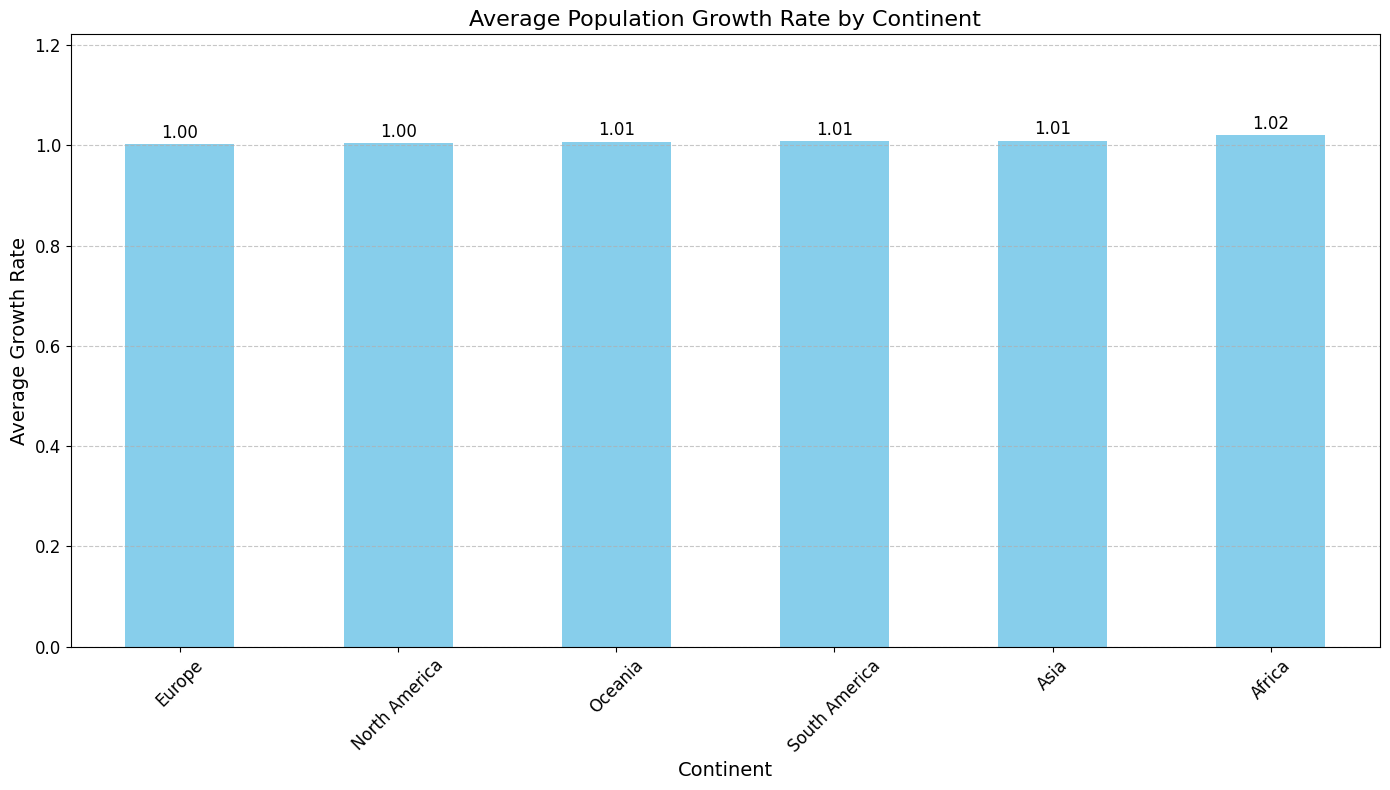

In [23]:
# Group by continent and calculate the average growth rate
avg_growth_rate = df.groupby('Continent')['Growth Rate'].mean().sort_values()

# Plot the graph
plt.figure(figsize=(14, 8))
bars = avg_growth_rate.plot(kind='bar', color='skyblue')

# Add labels on top of the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=12, xytext=(0, 8),
                  textcoords='offset points')

# Add title and labels with larger font sizes
plt.title('Average Population Growth Rate by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Average Growth Rate', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limit for better value label placement
plt.ylim(0, avg_growth_rate.max() + 0.2)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add tight layout to fit everything well
plt.tight_layout()
plt.show()

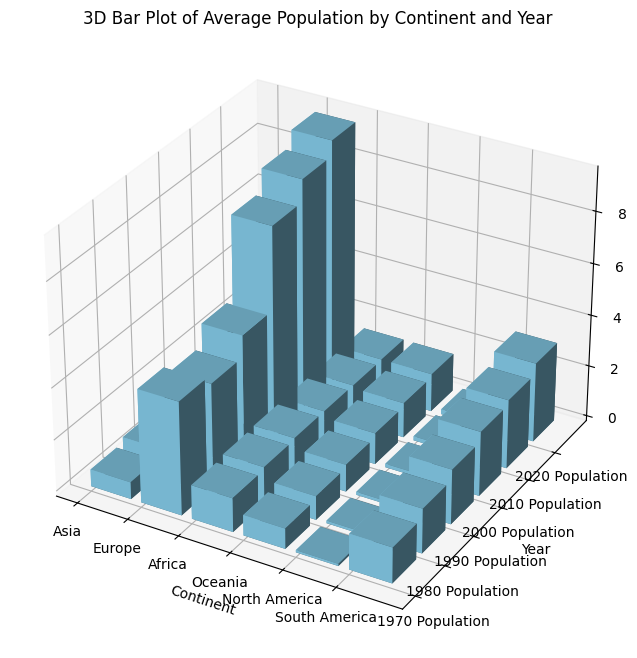

In [26]:
# Sample data for plotting
continents = df['Continent'].unique()
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population']
x_data = np.arange(len(continents))
y_data = np.arange(len(years))

xpos, ypos = np.meshgrid(x_data, y_data, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()

# Use population data for heights (just as an example)
zpos = np.zeros_like(xpos)
height = df.groupby('Continent')[years].mean().to_numpy().flatten()

# Bar width and depth
dx = dy = 0.8
dz = height

# Create the figure and the 3D axis
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='skyblue')

# Set axis labels
ax.set_xlabel('Continent')
ax.set_ylabel('Year')
ax.set_zlabel('Average Population')

# Set custom tick labels for x and y axis
ax.set_xticks(x_data)
ax.set_xticklabels(continents)

ax.set_yticks(y_data)
ax.set_yticklabels(years)

plt.title('3D Bar Plot of Average Population by Continent and Year')
plt.show()

In [ ]:
ax.set_yticklabels(years)

plt.title('3D Bar Plot of Average Population by Continent and Year')
plt.show()

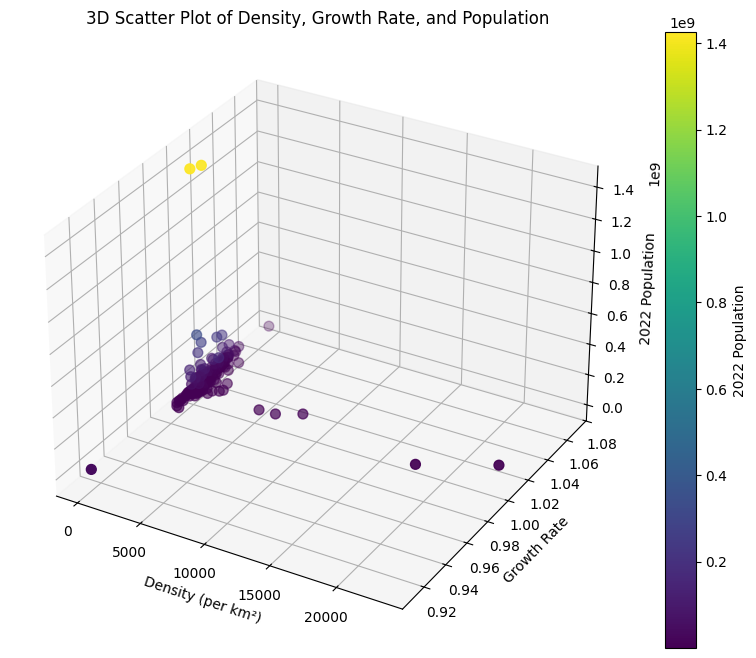

In [27]:
# Prepare data for the scatter plot
x = df['Density (per km²)']
y = df['Growth Rate']
z = df['2022 Population']

# Create the 3D figure and axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add color bar to show population values
fig.colorbar(scatter, ax=ax, label='2022 Population')

# Set axis labels
ax.set_xlabel('Density (per km²)')
ax.set_ylabel('Growth Rate')
ax.set_zlabel('2022 Population')

plt.title('3D Scatter Plot of Density, Growth Rate, and Population')
plt.show()

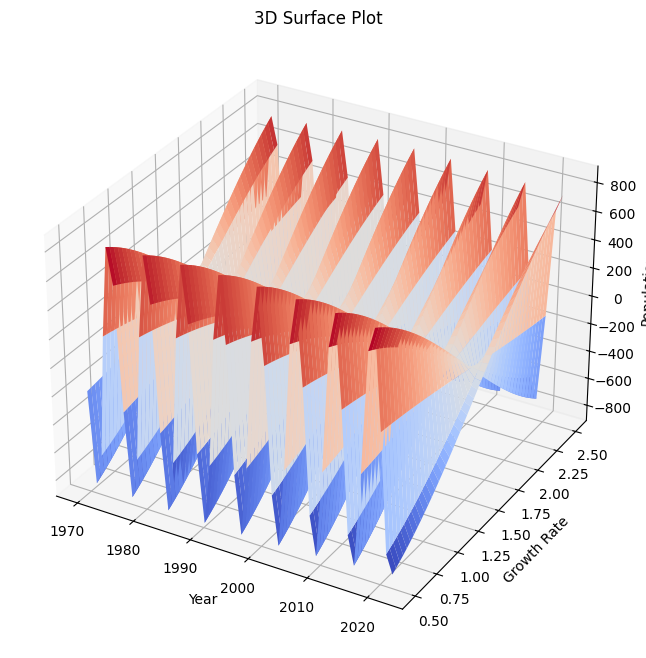

In [28]:
# Create meshgrid for year and continent-like values
years = np.linspace(1970, 2022, 50)  # 50 years evenly spaced
growth_rates = np.linspace(0.5, 2.5, 50)  # Sample growth rate range
years, growth_rates = np.meshgrid(years, growth_rates)

# Create a dummy surface based on some function, in practice use real data here
population = np.sin(years) * np.cos(growth_rates) * 1000

# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface
ax.plot_surface(years, growth_rates, population, cmap='coolwarm')

# Add labels
ax.set_xlabel('Year')
ax.set_ylabel('Growth Rate')
ax.set_zlabel('Population')

plt.title('3D Surface Plot')
plt.show()